In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [36]:
d = loadmat('kohn_pvc-11/stimuli_gratings/M_grating060.mat')

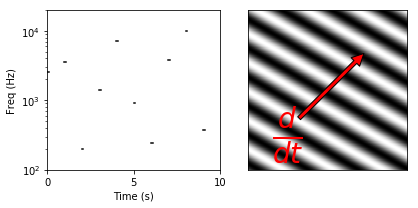

In [43]:
f, axes = plt.subplots(1, 2, figsize=(6, 3))

ax = axes[0]
ax.set_xlim(0, 10)
ax.set_xticks([0, 5, 10])
ax.set_xlabel('Time (s)')

ax.set_yscale('log')
ax.set_ylim(1e2, 2e4)
ax.set_xticks([0, 5, 10])
ax.set_ylabel('Freq (Hz)')
for ii in range(10):
    f = np.power(10., np.random.uniform(low=np.log10(2e2), high=np.log10(1e4)))
    ax.plot([ii, ii+.1], [f, f], c='k')

ax = axes[1]
ax.imshow(d['M'][:, :, 0], cmap='gray', extent=[0, 1, 0, 1], aspect='equal')
ax.set_xticks([])
ax.set_yticks([])
ax.annotate('', xy=(.75, .75), xytext=(.3, .3),
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='center',
            )
ax.text(.15, .15, r'$\frac{d}{dt}$', color='red', size=40)
plt.tight_layout()
plt.savefig('stimuli.pdf', dpi=300)